In [1]:
import os
import pandas as pd
import numpy as np
from geopy.distance import geodesic

In [2]:
train_path = '../data/hy_round2_train_20200225'

In [3]:
train_df_list = []
for file_name in os.listdir(train_path):
    df = pd.read_csv(os.path.join(train_path, file_name))
    train_df_list.append(df)

train_df = pd.concat(train_df_list)

train_df['time'] = pd.to_datetime(train_df['time'], format='%m%d %H:%M:%S')

all_df = pd.concat([train_df], sort=False)

In [27]:
def get_feature(arr):
    feature = [np.min(arr), np.max(arr), np.quantile(arr, 0.9), np.quantile(arr, 0.1),
               np.quantile(arr, 0.75), np.quantile(speed_list, 0.25), np.mean(arr), np.std(arr),
               np.median(arr),  np.std(arr) / np.mean(arr)]
    feature.append(np.corrcoef(np.array([arr[:-1], arr[1:]]))[0, 1])
    feature.append(skew(arr))
    feature.append(kurtosis(speed_list))
    return feature

In [35]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

features = []
for ship_id, group in all_df.groupby('渔船ID'):
    speed_feature.append([])

    type_ = group['type'].values[0]

    group = group.sort_values(by=['time'])
    lat = group['lat'].values
    lon = group['lon'].values
    time_ = group['time'].values
    
    dire = group['方向'].values

    speed_list = []
    for i in range(lat.shape[0]):
        if i == 0:
            continue
        hour = (time_[i] - time_[i-1]) / np.timedelta64(1,'h')
        dist = geodesic((lat[i-1], lon[i-1]), (lat[i ], lon[i]))
        speed_list.append(dist.km / hour)
        
    acc_list = []
    for i in range(len(speed_list)):
        if i == 0:
            continue
        hour = (time_[i] - time_[i-1]) / np.timedelta64(1,'h')
        acc = (speed_list[i] - speed_list[i-1]) / hour
        acc_list.append(acc)
        
    ang_list = []

    features.append(np.concatenate([get_feature(speed_list), get_feature(acc_list)]))

In [59]:
for ship_id, group in all_df.groupby('渔船ID'):
    speed_feature.append([])

    type_ = group['type'].values[0]

    group = group.sort_values(by=['time'])
    
    dire = group['方向'].values
    
    c = np.sum(np.cos(dire / 180 * np.pi)) / group.shape[0]
    s = np.sum(np.sin(dire / 180 * np.pi)) / group.shape[0]

    r = np.sqrt(c ** 2 + s ** 2)
    theta = np.arctan(s / c)
    print(r, theta, np.sqrt(-2 * np.log(r)))
    break

0.09161490450589758 -0.9469699827275767 2.186394890037885


0.5796246997552029 0.018743971265255375 1.0443892514469904


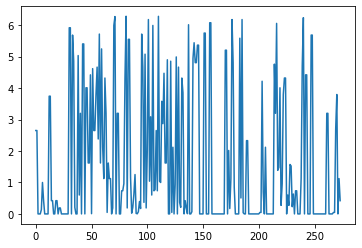

In [73]:
for ship_id, group in all_df.groupby('渔船ID'):
    type_ = group['type'].values[0]
    if type_ == '刺网':

        group = group.sort_values(by=['time'])

        dire = group['方向'].values

        turn_list = []
        for i in range(dire.shape[0]):
            if i == 0:
                continue
            turn = 1 - np.cos(dire[i-1] / 180 * np.pi - dire[i] / 180 * np.pi)
            turn_list.append(turn * np.pi)
        turn_list = np.array(turn_list)

        c = np.sum(np.cos(turn_list)) / (group.shape[0] - 1)
        s = np.sum(np.sin(turn_list)) / (group.shape[0] - 1)

        r = np.sqrt(c ** 2 + s ** 2)
        theta = np.arctan(s / c)
        print(r, theta, np.sqrt(-2 * np.log(r)))

        plt.plot(turn_list)

        break